In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("dark")
import numpy as np
import matplotlib
import pickle

In [5]:
# Load gate vector data
with open('Gatenet/output/' + 'test1' + '.pkl', 'rb') as f:
        input = pickle.load(f)

In [11]:
# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
parameter_dict = input[2]

In [12]:
print(parameter_dict)

{'batch_size': 100, 'gamma': 2, 'M': 10, 'L': 3, 'tensor_size': 20, 'num_batches': 500, 'learning_rate': 0.001, 'output_file': 'test'}


In [13]:
print(labels)

[0 7 1 5 0 2 0 7 4 8 8 3 2 2 7 2 3 6 8 8 4 7 3 7 7 0 2 3 1 2 6 2 6 7 3 3 6
 9 1 0 5 4 9 3 9 0 0 8 1 2 7 2 4 4 5 6 5 5 1 0 1 3 7 4 1 2 0 3 9 5 2 8 6 7
 0 8 5 3 8 4 5 3 1 5 2 9 0 8 2 1 3 9 3 7 1 9 1 6 9 9]


In [24]:
print(gates.shape)

(100, 3, 10)


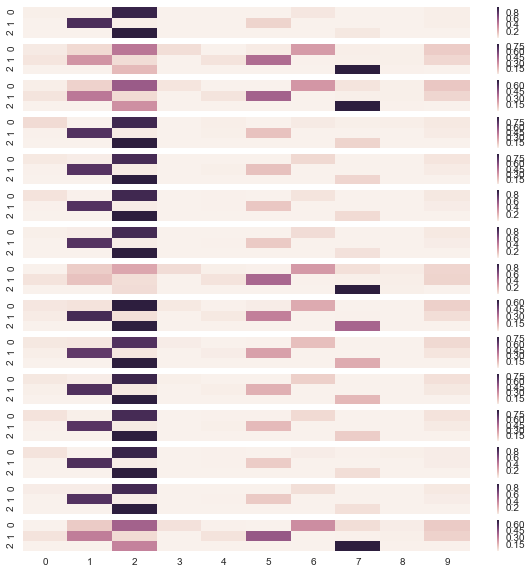

In [20]:
matplotlib.rcParams['figure.figsize'] = 10,10
num_test_digits = 15
fig, axs = plt.subplots(nrows=num_test_digits)
for i in range(num_test_digits):
    sns.heatmap(gates[i,:,:], ax=axs[i])

In [25]:
# Compute cosine similarity
gate_vectors = np.reshape(gates[:digits,:,:], (digits,parameter_dict['L']*parameter_dict['M']))
gate_vectors = np.transpose(gate_vectors)

trial = 2
output = np.zeros(num_test_digits)
for i in range(num_test_digits):
    a = gate_vectors[trial][:]
    b = gate_vectors[i][:]
    an = a/np.linalg.norm(a)
    bn = b/np.linalg.norm(b)
    output[i] = np.dot(an,bn)

print(output)
elems = np.argsort(output)
print(np.flip(elems, axis=0))

[ 0.82259246  0.47135041  1.          0.36067023  0.6242027   0.45860258
  0.61128259  0.31439079  0.41365197  0.68249381  0.45385533  0.99813943
  0.67189085  0.92002334  0.51685666]
[ 2 11 13  0  9 12  4  6 14  1  5 10  8  3  7]
